<a href="https://colab.research.google.com/github/Chaity01/Research_Segmentation_of_Leaves_From_Background_Images_Using_Double_UNet_Plus_Architecture/blob/main/Thesis_Rumex_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Python Libaries**

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
root_dir = "/content/drive/MyDrive/Thesis Rumex Leave-SUB/RumexLeaves/iNaturalist/"

# Preprocessing
### 1. Annotatated image generation
https://colab.research.google.com/drive/1HgWFCPoyXaF5znOtAPNazKcKQoCe1iZu#scrollTo=aAWaXHTWBWuj



## 2. Image resizing

In [ ]:
import cv2
import os

def resize_images(source, dest):
  files = os.listdir(source)
  if len(files) == 0:
    raise Exception(f"Directory is not correct")
  print(f"{len(files)} images will be resized")
  for filename in files:
    try:
      img = cv2.imread(f"{source}/{filename}")
      resized_img = cv2.resize(img, (224, 224))
      cv2.imwrite(f"{dest}/{filename}", resized_img)
    except Exception as e:
      print(f"{source}{filename} could not be resized. {e}")

#resize_images(f"{root_dir}", f"{root_dir}images_resized")

In [ ]:
!ls -1 '/content/drive/MyDrive/Thesis Rumex Leave-SUB/RumexLeaves/iNaturalist/images_resized' | wc -l

693


## Augmentation

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS=3
EPOCHS = 2
BATCH = 2
LR = 0.001 # to change the learning rate
shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
PATH = "/content/drive/MyDrive/Thesis Rumex Leave-SUB/RumexLeaves"

def create_dir(path):
    """ Create a directory. """
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
path = "/content/drive/MyDrive/Thesis Rumex Leave-SUB/RumexLeaves/iNaturalist"


In [ ]:

augmented_dir = root_dir+"/augment_data/"
os.makedirs(augmented_dir, exist_ok=True)

In [ ]:
# 1. Load the dataset
# 2. Use the albumentations library to augment the dataset.

import os
import cv2
from tqdm import tqdm
from glob import glob
from albumentations import RandomBrightnessContrast, CenterCrop, RandomRotate90, GridDistortion, HorizontalFlip, VerticalFlip, Transpose, Compose, RandomGamma, RGBShift, RandomContrast, HueSaturationValue, RandomBrightness

def load_data_1():
    images = sorted(glob(os.path.join(path, "images_resized/*")))
    masks = sorted(glob(os.path.join(path, "masks_resized/*")))
    num_image = len(images)
    num_masks = len(masks)
    if len(images) == 0 and len(masks) == 0:
      raise Exception(f"Folder paths are incorrect. Images: {num_image} Masks: {num_masks}")
    return images, masks

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def augment_data(images, masks, save_path, augment=True):
    H = 224
    W = 224

    for x, y in tqdm(zip(images, masks), total=len(images)):
        name = x.split("/")[-1].split(".")
        """ Extracting the name and extension of the image and the mask. """
        image_name = name[0]
        image_extn = name[1]

        name = y.split("/")[-1].split(".")
        mask_name = name[0]
        mask_extn = name[1]

        """ Reading image and mask. """
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_GRAYSCALE) # Expecting grayscale - bw image
        (thresh, y) = cv2.threshold(y, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        """ Augmentation """
        if augment == True:
            aug = RandomRotate90(p=1.0)
            augmented = aug(image=x, mask=y)
            x2 = augmented['image']
            y2 = augmented['mask']

            aug = RandomRotate90(p=0.5)
            augmented = aug(image=x, mask=y)
            x3 = augmented['image']
            y3 = augmented['mask']

            aug = GridDistortion(p=1.0)
            augmented = aug(image=x, mask=y)
            x4 = augmented['image']
            y4 = augmented['mask']

            aug = HorizontalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x5 = augmented['image']
            y5 = augmented['mask']

            aug = VerticalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x6 = augmented['image']
            y6 = augmented['mask']

            aug = Transpose(p=1.0)
            augmented = aug(image=x, mask=y)
            x7 = augmented['image']
            y7 = augmented['mask']

            aug = Compose([VerticalFlip(p=0.5),RandomRotate90(p=0.5)])
            augmented = aug(image=x, mask=y)
            x8 = augmented['image']
            y8 = augmented['mask']

            aug = RandomBrightnessContrast(p=1)
            augmented = aug(image=x, mask=y)
            x9 = augmented['image']
            y9 = augmented['mask']

            aug = RandomGamma(p=1)
            augmented = aug(image=x, mask=y)
            x10 = augmented['image']
            y10 = augmented['mask']

            aug = HueSaturationValue(p=1)
            augmented = aug(image=x, mask=y)
            x11 = augmented['image']
            y11 = augmented['mask']

            aug = RGBShift(p=1)
            augmented = aug(image=x, mask=y)
            x12 = augmented['image']
            y12 = augmented['mask']

            aug = RandomBrightness(p=1)
            augmented = aug(image=x, mask=y)
            x13 = augmented['image']
            y13 = augmented['mask']

            save_images = [x, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13]
            save_masks =  [y, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13]

        else:
            save_images = [x]
            save_masks = [y]

        """ Saving the image and mask. """
        idx = 0
        for i, m in zip(save_images, save_masks):
            i = cv2.resize(i, (W, H))
            m = cv2.resize(m, (W, H))

            if len(images) == 1:
                tmp_img_name = f"{image_name}.{image_extn}"
                tmp_mask_name = f"{mask_name}.{mask_extn}"
            else:
                tmp_img_name = f"{image_name}_{idx}.{image_extn}"
                tmp_mask_name = f"{mask_name}_{idx}.{mask_extn}"

            image_path = os.path.join(save_path, "images", tmp_img_name)
            mask_path = os.path.join(save_path, "masks", tmp_mask_name)
            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)

            idx += 1

def create_dirs(r_dir):
  os.makedirs(r_dir, exist_ok=True)
  os.makedirs(f"{r_dir}images", exist_ok=True)
  os.makedirs(f"{r_dir}masks", exist_ok=True)


def aug_data():
    """ Loading original images and masks. """
    augmented_dir = "/content/new_data/"
    create_dirs(augmented_dir)
    images, masks = load_data()
    print(f"Original Images: {len(images)} - Original Masks: {len(masks)}")

    """ Applying data augmentation. """
    augment_data(images, masks, augmented_dir, augment=True)

    """ Loading augmented images and masks. """
    images, masks = os.listdir(f"{augmented_dir}images"), os.listdir(f"{augmented_dir}masks"),
    print(f"\nAugmented Images: {len(images)} - Augmented Masks: {len(masks)}")


# aug_data()

In [ ]:
images_resized = len(os.listdir(root_dir + "/images_resized"))
masks_resized = len(os.listdir(root_dir + "/masks_resized"))
augmented_images = len(os.listdir(augmented_dir + "images"))
augmented_masks = len(os.listdir(augmented_dir + "masks"))
images_resized, masks_resized, augmented_images, augmented_masks

(693, 690, 8970, 8970)

In [ ]:
path = root_dir

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split


def load_data(path, split=0.1):
    images = sorted(glob(os.path.join(path, "images/*")))
    masks = sorted(glob(os.path.join(path, "masks/*")))

    total_size = len(images)
    print("total image", total_size)
    valid_size = int(split * total_size)
    test_size = int(split * total_size)

    train_x, valid_x = train_test_split(images, test_size=valid_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=valid_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=test_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=test_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

# load_data(augmented_dir)

In [ ]:
# Image handler

def read_image(x):
    x = x.decode()
    image = cv2.imread(x, cv2.IMREAD_COLOR)
    image = np.clip(image - np.median(image)+127, 0, 255)
    image = image/255.0
    image = image.astype(np.float32)
    return image

def read_mask(y):
    y = y.decode()
    mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
    mask = mask/255.0
    mask = mask.astype(np.float32)
    mask = np.expand_dims(mask, axis=-1)
    return mask

def parse_data(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        y = np.concatenate([y, y], axis=-1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([224, 224, 3])
    y.set_shape([224, 224, 2])
    return x, y

def tf_dataset(x, y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.shuffle(buffer_size=32)
    dataset = dataset.map(map_func=parse_data)
    dataset = dataset.repeat()
    dataset = dataset.batch(batch)
    return dataset

In [ ]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(augmented_dir)

print("Training data: ", len(train_x))
print("Validation data: ", len(valid_x))
print("Testing data: ", len(test_x))

print("Training masks: ", len(train_y))
print("Validation masks: ", len(valid_y))
print("Testing masks: ", len(test_y))

total image 8970
Training data:  7176
Validation data:  897
Testing data:  897
Training masks:  7176
Validation masks:  897
Testing masks:  897


In [ ]:
def read_and_rgb(x):
    x = cv2.imread(x)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    return x


#### Show some images and masks

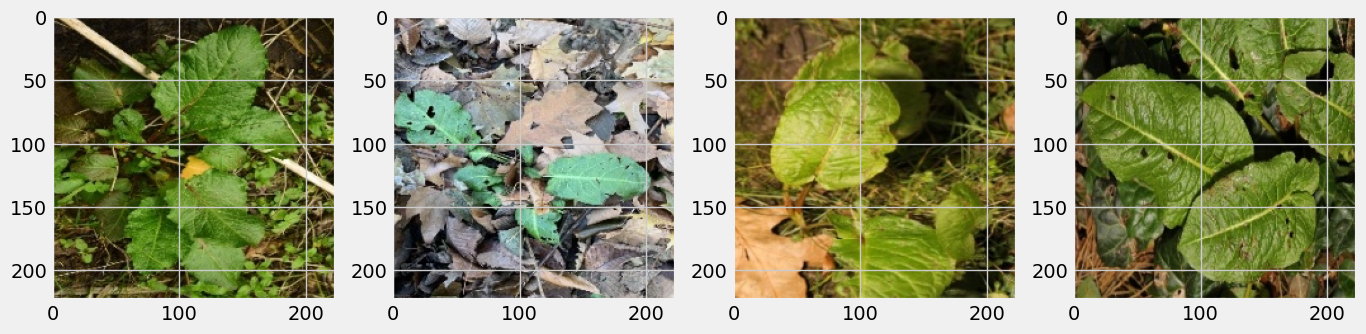

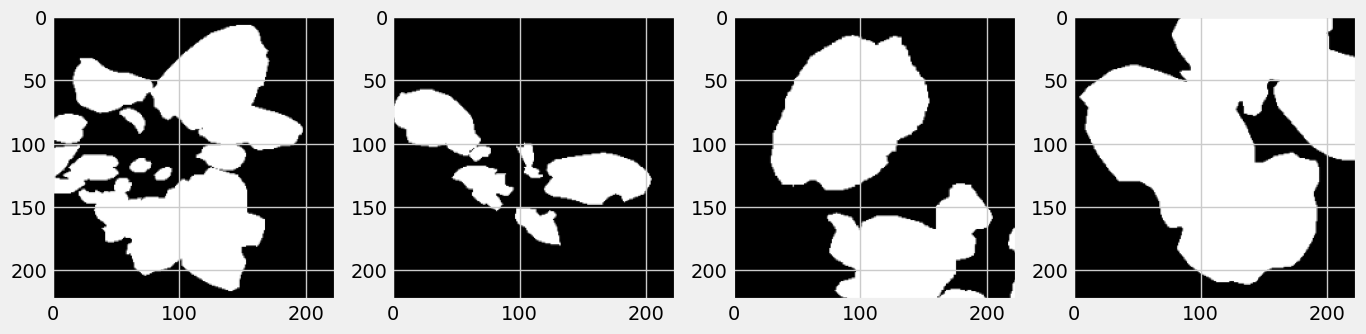

In [ ]:
fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(read_and_rgb(train_x[91]))

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(read_and_rgb(train_x[181]))
imgplot.set_clim(0.0, 0.7)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(read_and_rgb(train_x[271]))
imgplot.set_clim(0.0, 1.4)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(read_and_rgb(train_x[335]))
imgplot.set_clim(0.0, 2.1)

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(read_and_rgb(train_y[91]))

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(read_and_rgb(train_y[181]))
imgplot.set_clim(0.0, 0.7)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(read_and_rgb(train_y[271]))
imgplot.set_clim(0.0, 1.4)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(read_and_rgb(train_y[335]))
imgplot.set_clim(0.0, 1.4)

# **Training**

In [ ]:

import keras
!pip install keras-self-attention
from keras_self_attention import SeqSelfAttention
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet101V2, ResNet50V2, EfficientNetV2B3, EfficientNetB5, EfficientNetV2B0, InceptionResNetV2, DenseNet121, MobileNetV2,ResNet50,VGG16,VGG19, NASNetLarge,EfficientNetB7,EfficientNetV2S, EfficientNetV2M,EfficientNetV2L
import tensorflow as tf

tf.keras.backend.clear_session()

model_name = "MobileNetV2" # "VGG16", "EfficientNetV2B3", "MobileNetV2"


create_dir("files")
model_path = os.path.join("files", f"{model_name}.hdf5")
csv_path = os.path.join("files", f"{model_name}_history.csv")

if model_name == "ResNet101V2":
  model = ResNet101V2(include_top=False, weights='imagenet',  input_shape=(224, 224, 3))
elif model_name == "VGG16":
  model = VGG16(include_top=False, weights='imagenet',  input_shape=(224, 224, 3))
elif model_name == "EfficientNetV2B3": # ~12M	~80.0%
  model = EfficientNetV2B3(include_top=False, weights='imagenet',  input_shape=(224, 224, 3))
elif model_name == "MobileNetV2": # 3.5M	~72.0%	~0.3B
  model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
elif model_name == "EfficientNetV2M": # accuracy = ~85.2%, size = 54M
  model = EfficientNetV2M(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
elif model_name == "NASNetLarge":
  model = NASNetLarge(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
elif model_name == "EfficientNetB7":
  model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
else:
  raise Exception("Model name is not valid")


# model.summary()

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from albumentations import CenterCrop, RandomRotate90, GridDistortion, HorizontalFlip, VerticalFlip,  RandomBrightnessContrast
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization, Bidirectional, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, ZeroPadding2D,ConvLSTM2D,LSTM,GlobalAveragePooling2D, Reshape, Dense, Multiply, AveragePooling2D, UpSampling2D
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate,TimeDistributed, Add, GlobalMaxPooling2D, Multiply, Permute, multiply
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.applications import InceptionResNetV2, DenseNet121, MobileNetV2,ResNet50,VGG16,VGG19, NASNetLarge,EfficientNetB7,EfficientNetV2S, EfficientNetV2M,EfficientNetV2L
from tensorflow.keras.metrics import Recall, Precision, Accuracy, MeanIoU
from tensorflow.keras import backend as K

## Triple attention gate module

In [ ]:
# Ref : https://github.com/bnsreenu/python_for_microscopists

def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    # by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape
    # (None, 256,256,6), if specified axis=3 and rep=2.

     return tf.keras.layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)


def gating_signal(inputs, out_size):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = tf.keras.layers.Conv2D(out_size, (1, 1), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    return x


def attention_block(x, gating, inter_shape):

    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    theta_x = tf.keras.layers.Conv2D(inter_shape, (1, 1), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

    phi_g = tf.keras.layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)

    upsample_g = tf.keras.layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = tf.keras.layers.add([upsample_g, theta_x])
    act_xg = tf.keras.layers.Activation('relu')(concat_xg)

    psi = tf.keras.layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = tf.keras.layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)

    act_xg1 = channel_attention(act_xg)
    act_xg2 = squeeze_excite_block(act_xg)
    act_xg3 = spatial_attention_block(act_xg)

    x1 = tf.keras.layers.concatenate([act_xg1, act_xg2, act_xg3])
    x1 = UpSampling2D((2, 2), interpolation='bilinear')(x1)

    upsample_psi = tf.keras.layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32
    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = tf.keras.layers.concatenate([x1, x, upsample_psi])

    result = tf.keras.layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = tf.keras.layers.BatchNormalization()(result)
    return result_bn





def channel_attention(x, ratio=8):
    batch, _, _, channel = x.shape

    ## Shared layers
    l1 = Dense(channel//ratio, activation="relu", use_bias=False)
    l2 = Dense(channel, use_bias=False)

    ## Global Average Pooling
    x1 = GlobalAveragePooling2D()(x)
    x1 = l1(x1)
    x1 = l2(x1)

    ## Global Max Pooling
    x2 = GlobalMaxPooling2D()(x)
    x2 = l1(x2)
    x2 = l2(x2)

    ## Add both the features and pass through sigmoid
    feats = x1 + x2
    feats = Activation("sigmoid")(feats)
    feats = Multiply()([x, feats])

    return feats


tf.keras.backend.clear_session()
def squeeze_excite_block(inputs, ratio=16):
    init = inputs       ## (b, 128, 128, 32)
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)     ## (b, 32)   -> (b, 1, 1, 32)
    se = Reshape(se_shape)(se)
    se = Dense(filters//ratio, activation="relu", use_bias=False)(se)
    se = Dense(filters, activation="sigmoid", use_bias=False)(se)

    x = Conv2D(1, 1, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = Multiply()([x, se])
    return x


def spatial_attention_block(inputs):
    """
    Spatial Attention Module utilizing the inter-spatial relationship of features.
    """
    kernel_size = 7

    avg_pool = K.mean(inputs, axis=-1, keepdims=True)
    max_pool = K.max(inputs, axis=-1, keepdims=True)

    x = Concatenate()([avg_pool, max_pool])

    x = Conv2D(1, kernel_size, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(x)

    outputs = Multiply()([inputs, x])
    return outputs



def residual_conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    shortcut = Conv2D(num_filters, 1, dilation_rate=1, padding='same',strides=1)(input)
    shortcut = BatchNormalization(axis=3)(shortcut)
    res_path = Concatenate()([shortcut, x])
    res_path = Activation("relu")(res_path)


    x1 = squeeze_excite_block(res_path)
    x2 = spatial_attention_block(res_path)
    x3 = channel_attention(res_path)

    x = Concatenate()([x1, x2, x3])

    return x



## MKRC (Multi kernel residual convolution)

In [ ]:

def multi_kernel_convolution(x, filter):
    shape = x.shape

    y2 = tf.keras.layers.Conv2D(filter, 1,  padding="same", use_bias=False)(x)
    y2 = tf.keras.layers.BatchNormalization()(y2)
    y2 = tf.keras.layers.Activation("relu")(y2)

    y3 = tf.keras.layers.Conv2D(filter, 3,padding="same", use_bias=False)(x)
    y3 = tf.keras.layers.BatchNormalization()(y3)
    y3 = tf.keras.layers.Activation("relu")(y3)

    y4 = tf.keras.layers.Conv2D(filter, 5, padding="same", use_bias=False)(x)
    y4 = tf.keras.layers.BatchNormalization()(y4)
    y4 = tf.keras.layers.Activation("relu")(y4)

    y5 = tf.keras.layers.Conv2D(filter, 7, padding="same", use_bias=False)(x)
    y5 = tf.keras.layers.BatchNormalization()(y5)
    y5 = tf.keras.layers.Activation("relu")(y5)

    y6 = tf.keras.layers.Conv2D(filter, 9, padding="same", use_bias=False)(x)
    y6 = tf.keras.layers.BatchNormalization()(y6)
    y6 = tf.keras.layers.Activation("relu")(y6)


    y = tf.keras.layers.Concatenate()([y2, y3, y4, y5, y6])

    y = tf.keras.layers.Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.Activation("relu")(y)

    x1  = Conv2D(1,  1, padding="same", strides=1)(x)
    x1 = BatchNormalization()(x1)
    s = Concatenate()([x1, y])
    s = Activation("relu")(s)

    return s

## SE-ASPP

In [ ]:


def ASPP(x, filter):
    shape = x.shape

    y1 = tf.keras.layers.AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = tf.keras.layers.Conv2D(filter, 1, padding="same")(y1)
    y1 = tf.keras.layers.BatchNormalization()(y1)
    y1 = tf.keras.layers.Activation("relu")(y1)
    y1 = tf.keras.layers.UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)
    y1 = squeeze_excite_block(y1)

    y2 = tf.keras.layers.Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = tf.keras.layers.BatchNormalization()(y2)
    y2 = tf.keras.layers.Activation("relu")(y2)
    y2 = squeeze_excite_block(y2)

    y3 = tf.keras.layers.Conv2D(filter, 3, dilation_rate=2, padding="same", use_bias=False)(x)
    y3 = tf.keras.layers.BatchNormalization()(y3)
    y3 = tf.keras.layers.Activation("relu")(y3)
    y3 = squeeze_excite_block(y3)

    y4 = tf.keras.layers.Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y4 = tf.keras.layers.BatchNormalization()(y4)
    y4 = tf.keras.layers.Activation("relu")(y4)
    y4 = squeeze_excite_block(y4)

    y5 = tf.keras.layers.Conv2D(filter, 3, dilation_rate=10, padding="same", use_bias=False)(x)
    y5 = tf.keras.layers.BatchNormalization()(y5)
    y5 = tf.keras.layers.Activation("relu")(y5)
    y5 = squeeze_excite_block(y5)

    y6 = tf.keras.layers.Conv2D(filter, 3, dilation_rate=13, padding="same", use_bias=False)(x)
    y6 = tf.keras.layers.BatchNormalization()(y6)
    y6 = tf.keras.layers.Activation("relu")(y6)
    y6 = squeeze_excite_block(y6)

    y7 = tf.keras.layers.Conv2D(filter, 3, dilation_rate=16, padding="same", use_bias=False)(x)
    y7 = tf.keras.layers.BatchNormalization()(y7)
    y7 = tf.keras.layers.Activation("relu")(y7)
    y7 = squeeze_excite_block(y7)

    y = tf.keras.layers.Concatenate()([y1, y2, y3, y4, y5, y6, y7])

    y = tf.keras.layers.Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.Activation("relu")(y)
    # y = squeeze_excite_block(y)

    return y

## Encoder and decoder

In [ ]:

tf.keras.backend.clear_session()
def encoder1(inputs):
    skip_connections = []

    model = VGG16(include_top=False, weights='imagenet', input_tensor=inputs, input_shape=(256, 256, 3))
    names = ["input_1", "block1_pool", "block2_pool", "block3_pool"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)

    output = model.get_layer("block5_conv2").output
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [2, 112, 56, 28]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        gating = gating_signal(x, num_filters[i])
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        att = attention_block(tf.convert_to_tensor(skip_connections[i]), gating, num_filters[i])
        x = Concatenate()([x, att])
        x = residual_conv_block(x, f)

    return x


def encoder2(inputs):
    num_filters = [28, 56, 112, 224]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = residual_conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x) # param

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [224, 112, 56, 28]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        gating = gating_signal(x, num_filters[i])
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        skip1_att = attention_block(tf.convert_to_tensor(skip_1[i]), gating, num_filters[i])
        skip2_att = attention_block(tf.convert_to_tensor(skip_2[i]), gating, num_filters[i])
        x = Concatenate()([x, skip1_att, skip2_att])
        x = residual_conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return tf.keras.layers.Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)



# Build the model

In [ ]:
def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = multi_kernel_convolution(x, 64)
    x = ASPP(x, 64)
    x1 = squeeze_excite_block(x)
    x2 = spatial_attention_block(x)
    x3 = channel_attention(x)
    x = Concatenate()([x1,x2,x3])

    # gating = gating_signal(x, 64)
    # att = attention_block(tf.convert_to_tensor(skip_1), gating, 64)

    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = multi_kernel_convolution(x, 64)
    x = ASPP(x, 64)
    x1 = squeeze_excite_block(x)
    x2 = spatial_attention_block(x)
    x3 = channel_attention(x)
    x = Concatenate()([x1,x2,x3])
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

if __name__ == "__main__":
    model = build_model((224, 224, 3))

In [ ]:
# model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Loss functions

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + smooth) / (union + smooth)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

def focal_loss(y_true, y_pred):
    alpha=0.25
    gamma=2
    def focal_loss_with_logits(logits, targets, alpha, gamma, y_pred):
        weight_a = alpha * (1 - y_pred) ** gamma * targets
        weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)
        return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(-logits)) * (weight_a + weight_b) + logits * weight_b

    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
    logits = tf.math.log(y_pred / (1 - y_pred))
    loss = focal_loss_with_logits(logits=logits, targets=y_true, alpha=alpha, gamma=gamma, y_pred=y_pred)
    # or reduce_sum and/or axis=-1
    return tf.reduce_mean(loss)


## Model training

In [ ]:
import datetime

train_dataset = tf_dataset(train_x, train_y, batch=BATCH)
valid_dataset = tf_dataset(valid_x, valid_y, batch=BATCH)

opt = tf.keras.optimizers.Nadam(LR)
metrics = ['accuracy', dice_coef, Recall(), Precision(), iou, MeanIoU(num_classes=2)]
# metrics = [dice_coef, Recall(), Precision(), iou, MeanIoU(num_classes = 2)]
model.compile(loss=bce_dice_loss, optimizer=opt, metrics=metrics)

checkpoint_root = f"/content/checkpoints/{model_name}"
os.makedirs(checkpoint_root, exist_ok=True)
now = datetime.datetime.now()

current_time = now.strftime("%Y_%m_%d_%H_%M")

checkpoint_filepath = f"{checkpoint_root}/model-{{epoch:02d}}-{{val_loss:.2f}}.hdf5"
hist_file_root = f'{root_dir}csv_history2'
create_dir(hist_file_root)
hist_csv_file = f'{hist_file_root}/{model_name}_{current_time}_history.csv'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_dice_coef',
    mode='max',
    # save_best_only=True
    )

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10),
    CSVLogger(hist_csv_file),
    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
    model_checkpoint_callback]

In [ ]:
if os.path.exists(model_path):
  model.load_weights(checkpoint_filepath)


In [ ]:
train_steps = len(train_x)//BATCH//5
valid_steps = len(valid_x)//BATCH//5
train_steps, valid_steps

In [ ]:
train_steps = len(train_x)//BATCH//5
valid_steps = len(valid_x)//BATCH//5

if len(train_x) % BATCH != 0:
    train_steps += 1
if len(valid_x) % BATCH != 0:
    valid_steps += 1

hist=model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=EPOCHS,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=callbacks
)




In [ ]:
!ls /content

## Testing

In [ ]:
import csv

test_dataset = tf_dataset(test_x, test_y, batch=BATCH)

test_steps = (len(test_x)//BATCH)
if len(test_x) % BATCH != 0:
    test_steps += 1

now = datetime.datetime.now()
current_time = now.strftime("%Y_%m_%d_%H_%M")

test_result = model.evaluate(test_dataset, steps=test_steps)
test_file_root = f'{root_dir}test_values2'
print("test result", test_result)
with open(f'{test_file_root}/{model_name}_{test_result[2]}_{current_time}.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Metric', 'Value'])
    writer.writerow(['Loss', test_result[0]])
    writer.writerow(['Accuracy', test_result[1]])
    writer.writerow(['Dice coef', test_result[2]])
    writer.writerow(['Recall', test_result[3]])
    writer.writerow(['Precision', test_result[4]])
    writer.writerow(['IoU', test_result[5]])
    writer.writerow(['Mean IoU', test_result[1]])


## Plot

In [ ]:
# Plot training & validation accuracy values
plt.rcParams['figure.dpi'] = 150
plt.figure(1,figsize=(7,5))
hist = hist.history
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid('on')
plt.show()


# Plot training & validation loss values
plt.rcParams['figure.dpi'] = 150
plt.figure(1,figsize=(7,5))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid('on')
plt.show()

# Plot training & validation dice coefficient values
plt.rcParams['figure.dpi'] = 150
plt.figure(1,figsize=(7,5))
plt.plot(hist['dice_coef'])
plt.plot(hist['val_dice_coef'])
plt.title('Dice Value')
plt.ylabel('dice_coef')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid('on')
plt.show()


# Plot training & validation model_iou values
plt.rcParams['figure.dpi'] = 150
plt.figure(1,figsize=(7,5))
plt.plot(hist['iou'])
plt.plot(hist['val_iou'])
plt.title('Model IoU')
plt.ylabel('IoU')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid('on')
plt.show()


## Result and analysis

https://colab.research.google.com/drive/1xsR_8EIoN8tQ1sxmE8HsxpvEXZmpcB6D?authuser=1#scrollTo=3ycV4qmaRqZt